In [1]:
import pandas as pd
import numpy as np
import os 
import json 
import matplotlib.path as mpath
import matplotlib.pyplot as plt

In [2]:
few_shot_classes = {"Nofinding": 0,
    'NoduleMass': 9,
    'Infiltration': 7,
    'LungOpacity': 3,
    'Consolidation': 4,
    'Pleuralthickening': 5,
    'ILD': 6,
    'Cardiomegaly': 2,
    'Pulmonaryfibrosis': 8,
    'Aorticenlargement': 1,
    'Otherlesion': 10,
    'Pleuraleffusion': 11,
    'Calcification': 12,
    'Atelectasis': 13,
    'Pneumothorax': 14}

In [5]:
p = '/data3/jessica/data/labelGAN/train_images/masks_json/'
p_image = '/data3/jessica/data/labelGAN/train_images/generated/'

Get image masks from json

In [6]:
for elem in os.listdir(p):
    print(elem)
    imagename = elem.split("_mask")[0]
    print(imagename)
    with open(p + elem) as file:
        data = json.load(file)
    mask = np.zeros((1024, 1024))
    for shape in data['shapes']:
        if shape['label'] == "lung":
            print(shape['points'])
            polygon = shape['points']
            polygon = [[elem[1], elem[0]]for elem in polygon]
            polygon = np.array(polygon, dtype=int)
            path = mpath.Path(np.array(polygon, dtype=int))
            rr, cc = np.meshgrid(np.arange(mask.shape[0]), np.arange(mask.shape[1]), indexing='ij')
            mask_polygon = path.contains_points(np.hstack((rr.reshape(-1, 1), cc.reshape(-1, 1)))).reshape(mask.shape)
            mask = np.logical_or(mask, mask_polygon)
            # save the image as a segmentation mask
            plt.imsave(f'{p}/{imagename}_mask.png', mask, cmap='gray')

281ea309fd2fd61c9955f9d29c88a092_mask.json
281ea309fd2fd61c9955f9d29c88a092
[[271.327868852459, 199.1803278688525], [220.5081967213115, 225.40983606557376], [166.40983606557378, 269.672131147541], [123.78688524590163, 320.4918032786885], [102.47540983606558, 381.1475409836065], [86.08196721311475, 461.47540983606564], [87.72131147540983, 530.327868852459], [91.0, 625.4098360655738], [94.27868852459017, 722.1311475409836], [91.0, 763.1147540983607], [131.98360655737704, 697.5409836065573], [199.19672131147541, 664.7540983606558], [274.60655737704917, 641.8032786885246], [336.9016393442623, 641.8032786885246], [328.7049180327869, 599.1803278688525], [317.2295081967213, 548.360655737705], [333.62295081967216, 518.8524590163935], [345.09836065573774, 481.1475409836065], [336.9016393442623, 438.5245901639345], [336.9016393442623, 395.9016393442623], [351.65573770491807, 341.8032786885246], [389.3606557377049, 304.09836065573774], [417.2295081967213, 261.4754098360656], [417.2295081967213, 2

Generate Latent avg from all latents 

In [78]:
p = '/home/jessica/labelGAN/Image2StyleGAN/images/generated_latents_from_class_distr/'
avg_latent = []
for elem in os.listdir(p):
    if "tophat" in elem: continue
    data = np.load(p + elem)
    avg_latent.append(data.squeeze())
test = np.array(avg_latent).mean(axis=0)

In [83]:
t = np.array(avg_latent)
np.save("/home/jessica/labelGAN/Image2StyleGAN/images/vinbig_latent_all.npy", t)

In [84]:
t.shape

./generations/latent_stylegan1.npy",
./generations/avg_latent_stylegan1.npy",

(304, 18, 512)

In [82]:
np.save("/home/jessica/labelGAN/Image2StyleGAN/images/vinbig_avg_latent.npy", test)

In [67]:
ls = np.load('./generations/avg_latent_stylegan1.npy')

In [10]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 


In [ ]:
few_shot_classes = {"Nofinding": 0,
    'NoduleMass': 9,
    'Infiltration': 7,
    'LungOpacity': 3,
    'Consolidation': 4,
    'Pleuralthickening': 5,
    'ILD': 6,
    'Cardiomegaly': 2,
    'Pulmonaryfibrosis': 8,
    'Aorticenlargement': 1,
    'Otherlesion': 10,
    'Pleuraleffusion': 11,
    'Calcification': 12,
    'Atelectasis': 13,
    'Pneumothorax': 14}

In [18]:
mask_path = '/data3/jessica/data/labelGAN/results_dir_multitask_generation_segm_new/vis_2000/8_Pulmonaryfibrosis_23_tophat.npy1_mask.jpg'

In [21]:
image_path = '/data3/jessica/data/labelGAN/Image2StyleGAN/images/generated_images_from_class_distr/Pulmonaryfibrosis_23_tophat.png'

In [22]:
image = cv2.imread(image_path)

In [19]:
mask = cv2.imread(mask_path)

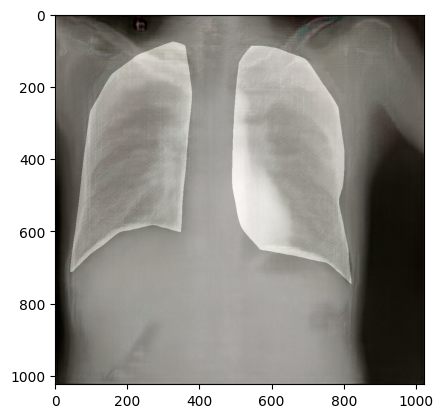

In [23]:

overlay = cv2.addWeighted(image, 0.7, mask, 0.3, 0)

# Display the overlay
plt.imshow(overlay)
plt.show()
